In [1]:
''''
'Implementation of the K-means algorithm for continuous data
'''
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

#load the data into a dataframe
filepath = r"C:\Users\Admin\Machine Learning Fundamentals\CSV_files\MLData.xlsx"
df = pd.read_excel(filepath)

#drop one of the useless column.
df =  df.drop(columns=['DA concentration'])

#assign feature and target variables and display the rows of the dataframe.
X = df.drop('DA Concentration (uM)', axis=1) 
y = df['DA Concentration (uM)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarize the features same as SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2]:
#initialize the KNN regressor and train the model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

#predict the target variable
y_pred = knn_model.predict(X_test_scaled)

#evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#display the evaluation metrics
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

#show predictions vs actual values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

Mean Squared Error:  8270.0
R2 Score:  0.8705790297339593
    Actual  Predicted
27       0       80.0
40     600      660.0
26       0      150.0
43      50       20.0
24       0      140.0
37     200      140.0
12     700      640.0
19       0       50.0
4       50       30.0
25       0      140.0


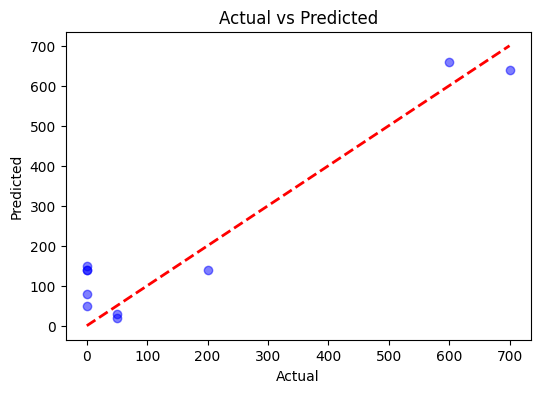

In [3]:
#let's plot the predictions vs actual values
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=y_test,
    y=y_pred,
    mode='markers',
    name='Predictions',
    marker=dict(color='blue', opacity=0.5)
))

# Add the diagonal line for actual value
fig.add_trace(go.Scatter(
    x=[y_test.min(), y_test.max()],
    y=[y_test.min(), y_test.max()],
    mode='lines',
    name='Perfect Prediction',
    line=dict(color='red', dash='dash')
))

fig.update_layout(
    title='Actual vs Predicted Values',
    xaxis_title='Actual Values',
    yaxis_title='Predicted Values',
    width=800,
    height=600,
    hovermode='closest'
)

fig.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Standardizing the features
scaler = StandardScaler()
X_train_scaled_manual = scaler.fit_transform(X_train)
X_test_scaled_manual = scaler.transform(X_test)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],  
    'p': [1, 2]  
}

knn_model = KNeighborsRegressor()
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled_manual, y_train)

# Output the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score (Negative MSE): {grid_search.best_score_}")

# Train the model with the best parameters
best_knn_model = grid_search.best_estimator_

# Predict on the test set
y_pred_manual_knn_best = best_knn_model.predict(X_test_scaled_manual)

# Evaluate the model's performance
mse_manual_knn_best = mean_squared_error(y_test, y_pred_manual_knn_best)
r2_manual_knn_best = r2_score(y_test, y_pred_manual_knn_best)

# Output performance metrics
print(f"Mean Squared Error (Best KNN Manual Test Split): {mse_manual_knn_best}")
print(f"R^2 Score (Best KNN Manual Test Split): {r2_manual_knn_best}")


Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Score (Negative MSE): -16529.93173931056
Mean Squared Error (Best KNN Manual Test Split): 14426.727390486683
R^2 Score (Best KNN Manual Test Split): 0.7742296183022428


In [7]:
#initialize the KNN regressor and train the model
knn_model2 = KNeighborsRegressor(n_neighbors=3, weights='distance', p=1)
knn_model2.fit(X_train_scaled, y_train)

#predict the target variable
y_pred2 = knn_model2.predict(X_test_scaled)

#evaluate the model
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred)

#display the evaluation metrics
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

#show predictions vs actual values
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
print(df2)

Mean Squared Error:  14426.727390486683
R2 Score:  0.7742296183022428
    Actual   Predicted
27       0  202.337056
40     600  524.457555
26       0  134.182962
43      50   36.865265
24       0   75.810175
37     200  181.193532
12     700  608.278906
19       0   45.626917
4       50   18.457729
25       0  248.701397


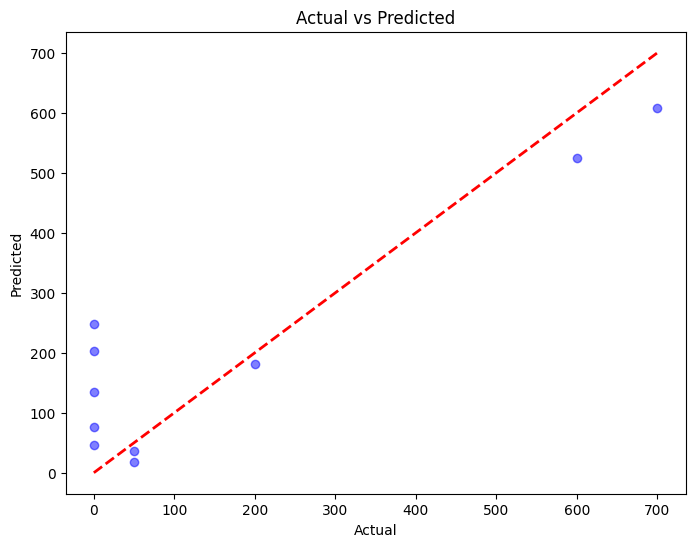

In [8]:
#let's plot the predictions vs actual values
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred2, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()